# Modelling Lending Club Loan Level Data
### by Jérôme Blanchet


# Abstract





# Table of Contents



# Part 1) Data and Modules Importation

In [2]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
from __future__ import print_function
from __future__ import division
from scipy.stats import skew, boxcox
from scipy import stats
import statsmodels.api as sm
from pandas import DataFrame
from scipy.stats.stats import pearsonr
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy.stats as stats
from mpl_toolkits.axes_grid.anchored_artists import AnchoredDrawingArea
import utils
#import skutils
import clone
from IPython.display import Image
import missingno as msno
from ggplot import *
#matplotlib.style.use('ggplot')

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold 
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import StratifiedKFold, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sompy.visualization.mapview import View2D
#from sompy.visualization.umatrix import UMatrixView
#from sompy.visualization.histogram import Hist2d
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.tree import _tree
#from feature import DropInvariant, CombineLevels, SelectFeature, CreateFeature

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from deep_forest import MGCForest
#import xgboost as xgb
#from xgboost.sklearn import XGBRegressor

import tensorflow as tf
tf.python.control_flow_ops = tf
from keras.models import Sequential
from keras.models import save_model, load_model
from keras.layers.advanced_activations import PReLU
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD

import io
import requests

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy
print('numpy: {}'.format(numpy.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import keras
print('keras: {}'.format(keras.__version__))
import tensorflow
print('tensorflow: {}'.format(tensorflow.__version__))

Python: 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
scipy: 0.18.1
numpy: 1.11.1
matplotlib: 1.5.3
pandas: 0.18.1
sklearn: 0.17.1
keras: 1.2.1
tensorflow: 0.12.1


In [3]:
dataA = pd.read_csv("C:/Users/jeblanch/Documents/LoanStats3a.csv");
dataB = pd.read_csv("C:/Users/jeblanch/Documents/LoanStats3b.csv");
dataC = pd.read_csv("C:/Users/jeblanch/Documents/LoanStats3c.csv");
dataD = pd.read_csv("C:/Users/jeblanch/Documents/LoanStats3d.csv");
dataE = pd.read_csv("C:/Users/jeblanch/Documents/LoanStats_2016Q1.csv");
dataF = pd.read_csv("C:/Users/jeblanch/Documents/LoanStats_2016Q2.csv");
dataG = pd.read_csv("C:/Users/jeblanch/Documents/LoanStats_2016Q3.csv");
dataH = pd.read_csv("C:/Users/jeblanch/Documents/LoanStats_2016Q4.csv");
dataI = pd.read_csv("C:/Users/jeblanch/Documents/PH.csv");

## Part 2) Data Description and Interaction

In [4]:
DATA = pd.concat((dataA, dataB, dataC, dataD, dataE, dataF, dataG, dataH), axis=0)
DATA.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,NaN,Jun-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
dataI.head(1)

,﻿LOAN_ID,appl_fico_band,Last_FICO_BAND
0,54734,735-739,755-759


In [6]:
dataI = dataI.rename(columns={'\ufeffLOAN_ID': 'id'})

In [7]:
dataI.head(1)

,id,appl_fico_band,Last_FICO_BAND
0,54734,735-739,755-759


In [8]:
DATA = pd.merge(DATA, dataI, on='id', how='left')

In [9]:
DATA.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,appl_fico_band,Last_FICO_BAND
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,NaN,Jun-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,735-739,735-739


In [10]:
DATA.shape

(1321792, 113)

In [11]:
DATA.appl_fico_band.isnull().sum()

308816

In [12]:
DATA.Last_FICO_BAND.isnull().sum()

308816

In [13]:
DATA.loan_status.value_counts()

Current                                                928827
Fully Paid                                             289898
Charged Off                                             63666
Late (31-120 days)                                      14874
In Grace Period                                         11528
Issued                                                   6074
Late (16-30 days)                                        3967
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                   206
Name: loan_status, dtype: int64

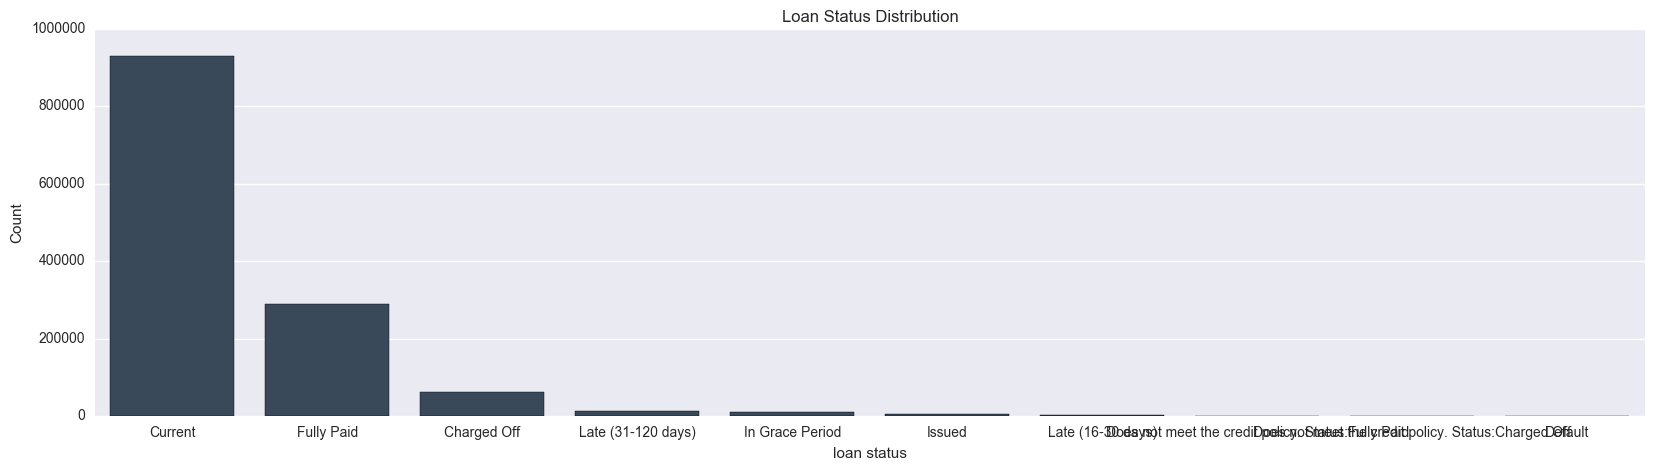

In [39]:
dataloanstatus = pd.DataFrame(DATA.loan_status.value_counts()).reset_index()
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=dataloanstatus,x="index",y="loan_status",ax=ax, color="#34495e")
ax.set(xlabel='loan status', ylabel='Count',title="Loan Status Distribution")

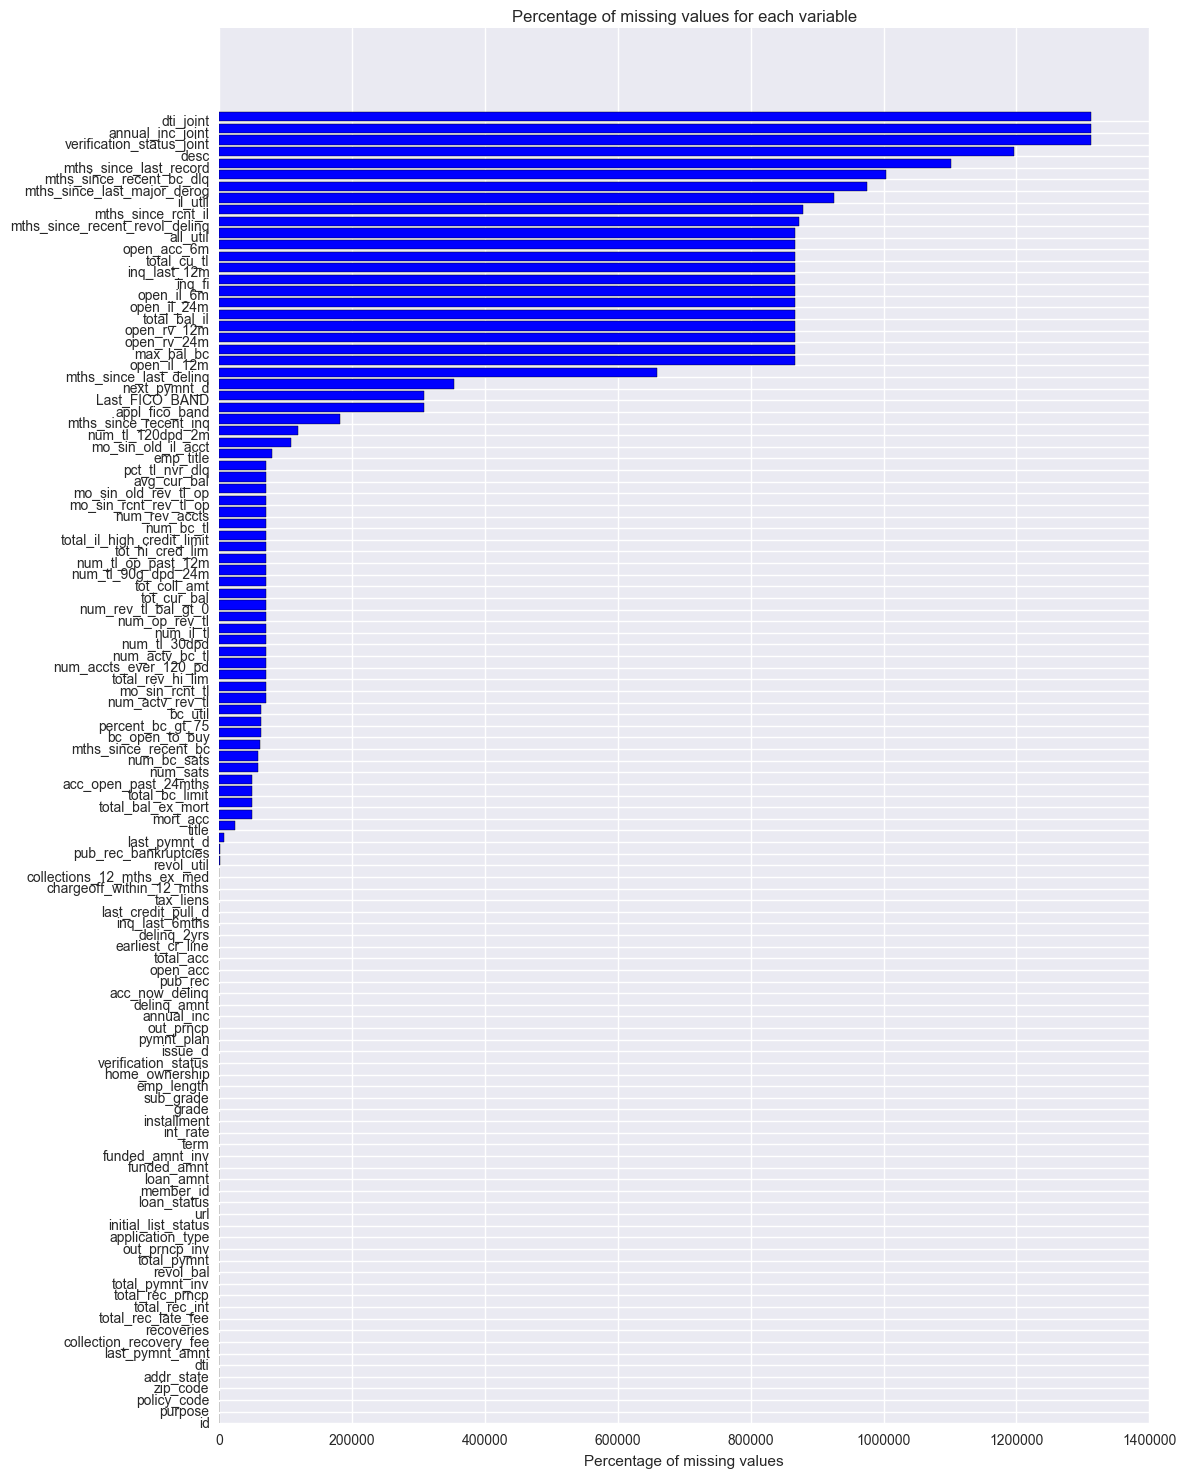

In [14]:
miss = DATA.isnull().sum(axis=0).reset_index()
miss.columns = ['column_name', 'missing_count']
miss = miss.sort_values(by='missing_count')
ind = np.arange(miss.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, miss.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(miss.column_name.values, rotation='horizontal')
ax.set_xlabel("Percentage of missing values")
ax.set_title("Percentage of missing values for each variable")
plt.show()

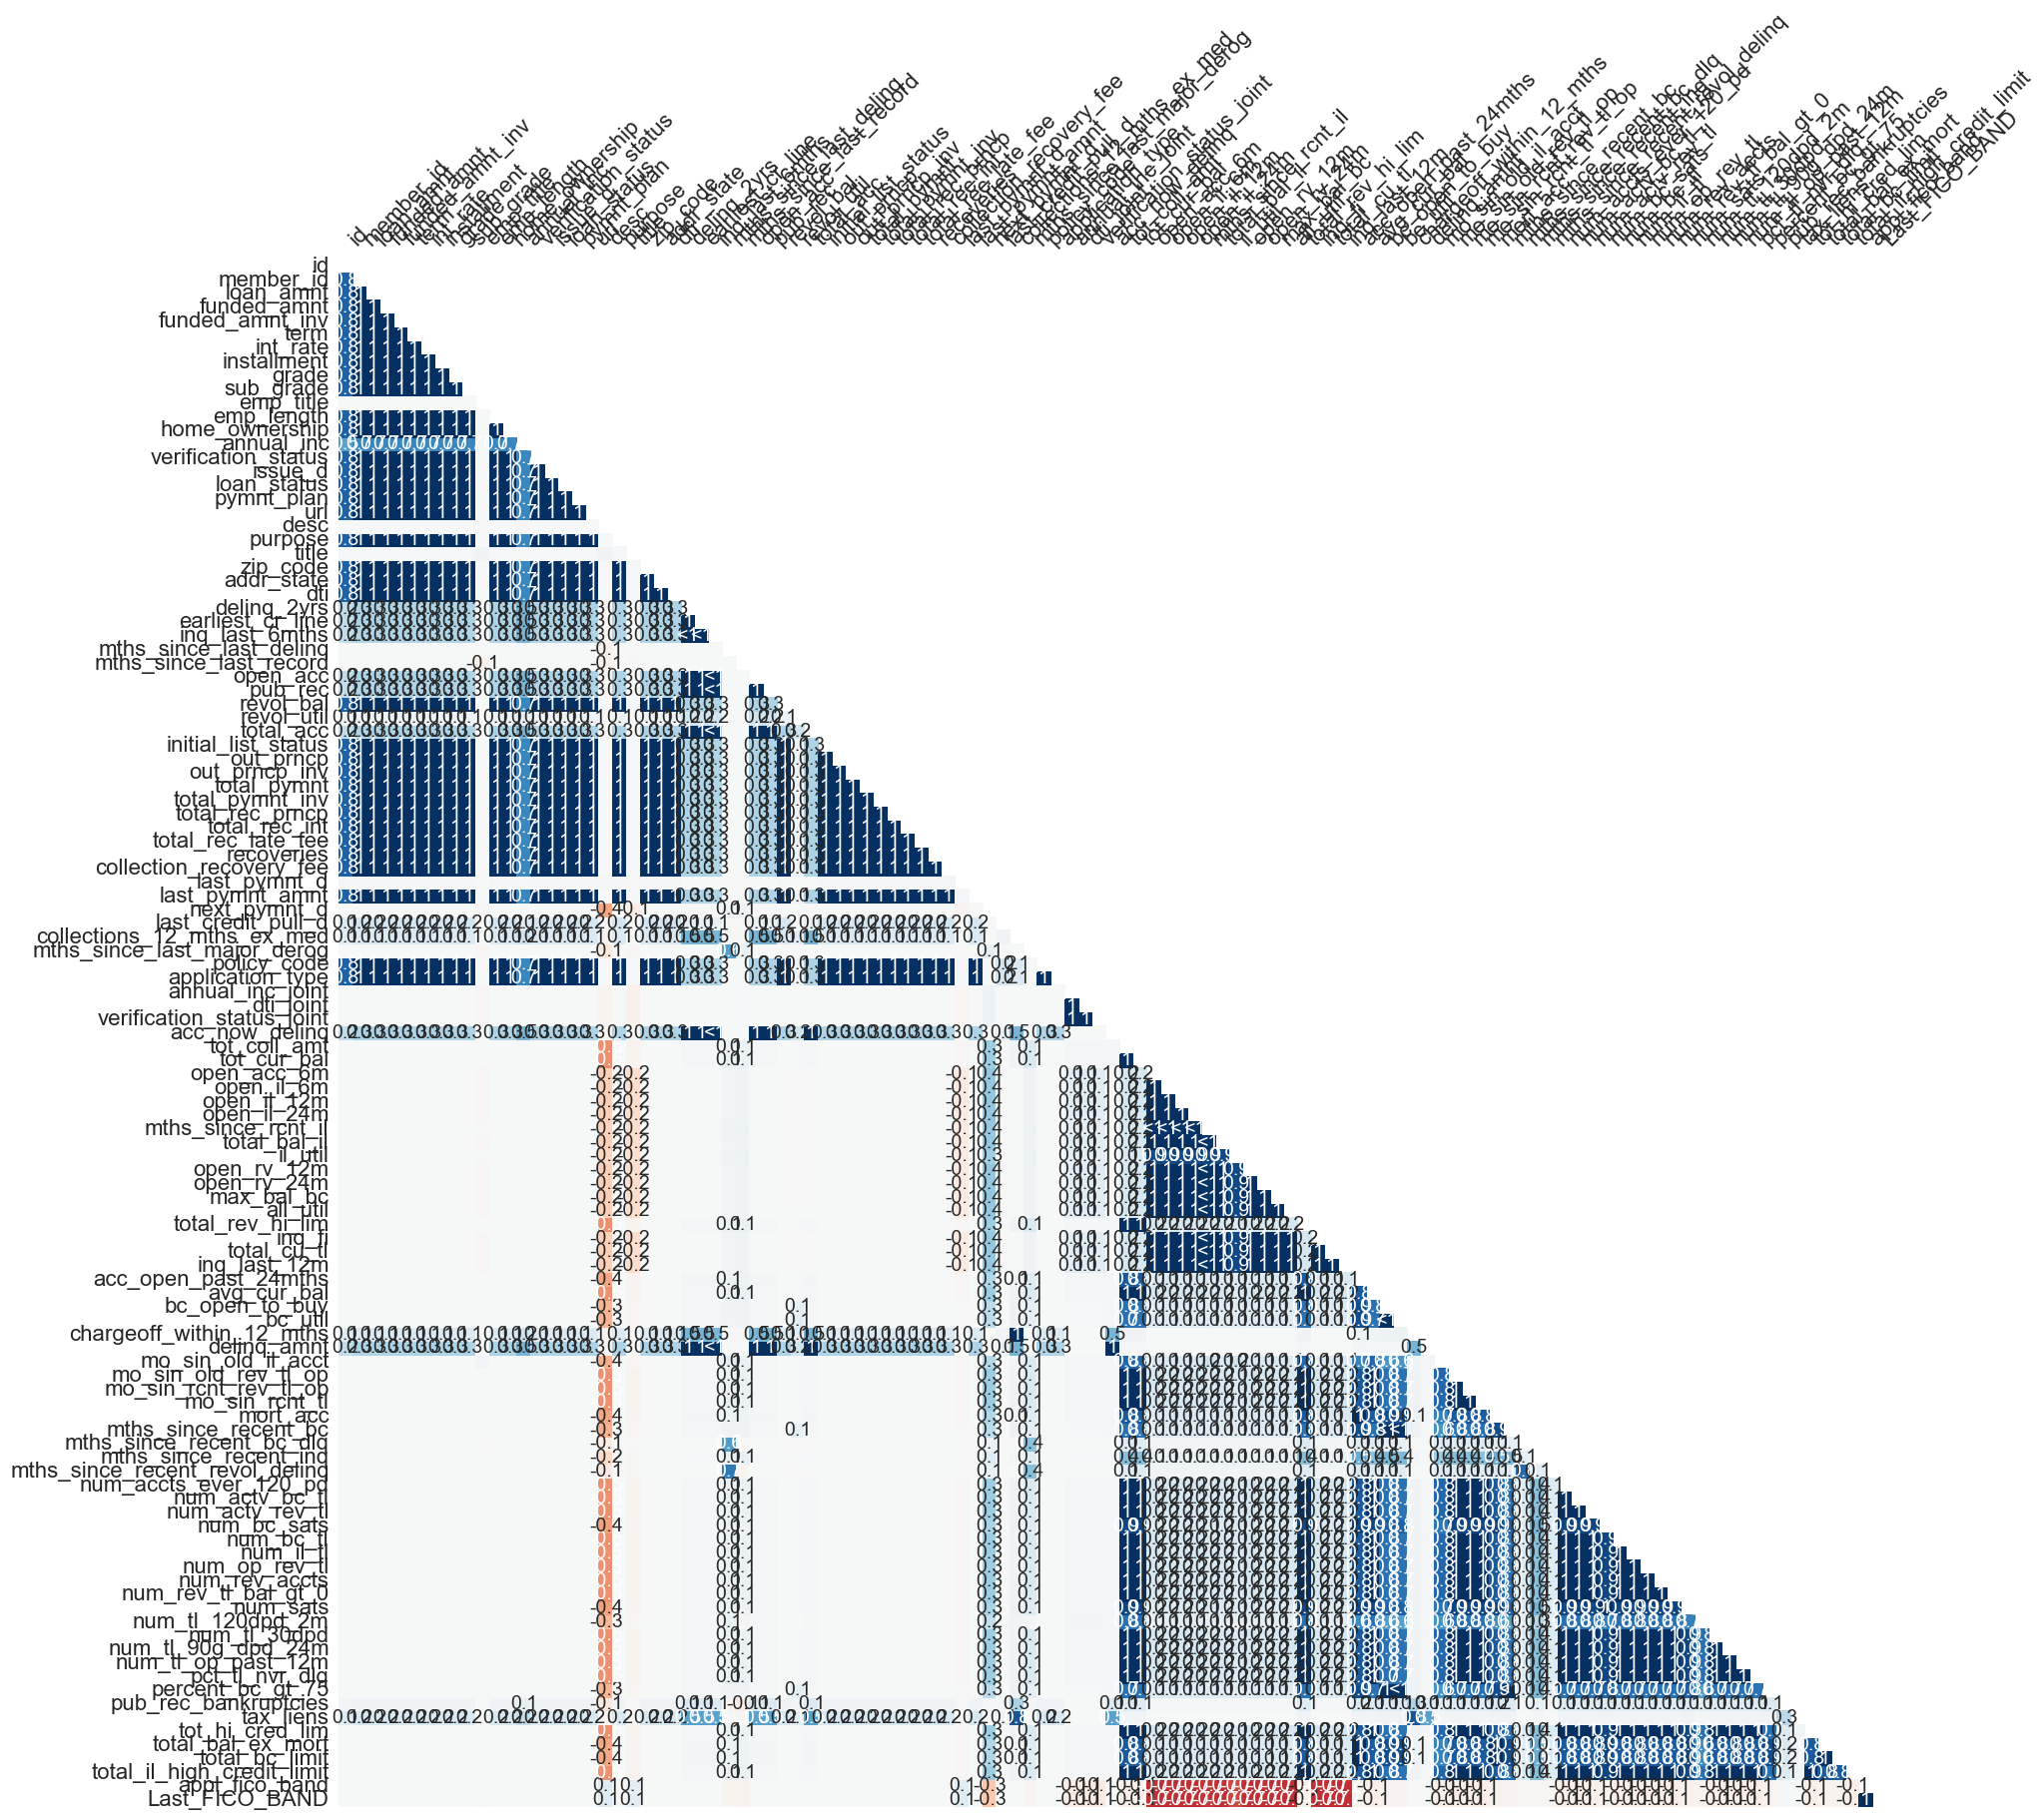

In [16]:
missingValueColumns = DATA.columns[DATA.isnull().any()].tolist()
msno.heatmap(DATA[missingValueColumns],figsize=(20,20))

In [14]:
missing = DATA.isnull().sum(axis=0).reset_index()
missing.columns = ['column_name', 'missing_count']
missing['%'] = missing['missing_count'] / DATA.shape[0]
LIST = missing.ix[missing['%']<0.00001].column_name
LIST

0                          id
1                   member_id
2                   loan_amnt
3                 funded_amnt
4             funded_amnt_inv
5                        term
6                    int_rate
7                 installment
8                       grade
9                   sub_grade
11                 emp_length
12             home_ownership
13                 annual_inc
14        verification_status
15                    issue_d
16                loan_status
17                 pymnt_plan
18                        url
20                    purpose
22                   zip_code
23                 addr_state
24                        dti
32                  revol_bal
35        initial_list_status
36                  out_prncp
37              out_prncp_inv
38                total_pymnt
39            total_pymnt_inv
40            total_rec_prncp
41              total_rec_int
42         total_rec_late_fee
43                 recoveries
44    collection_recovery_fee
46        

In [48]:
dtype_DATA = DATA.dtypes.reset_index()
dtype_DATA.columns = ["VARIABLE", "DType"]
dtype_DATA.groupby("DType").aggregate('count').reset_index()

,DType,VARIABLE
0,float64,85
1,object,28


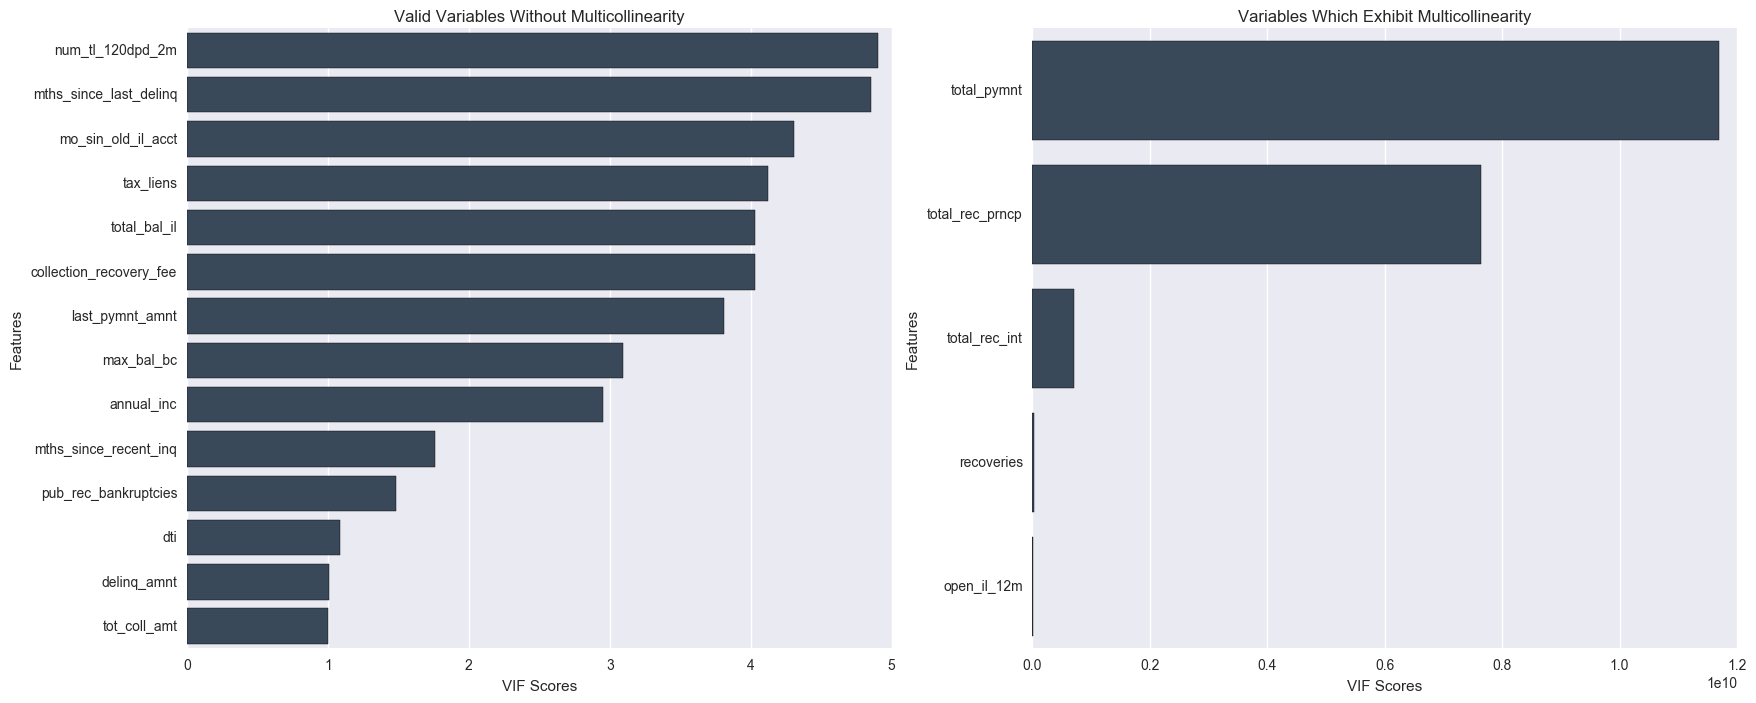

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import warnings
warnings.filterwarnings("ignore")

def calculate_vif_(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif

numericalCol = []
for f in DATA.columns:
    if DATA[f].dtype!='object' and f not in ["member_id", "id"]:
        numericalCol.append(f)
DATADATA = DATA[numericalCol].fillna(-999)
vifDict = calculate_vif_(DATADATA)

vifDf = pd.DataFrame()
vifDf['variables'] = vifDict.keys()
vifDf['vifScore'] = vifDict.values()
vifDf.sort_values(by=['vifScore'],ascending=False,inplace=True)
validVariables = vifDf[vifDf["vifScore"]<=5]
variablesWithMC  = vifDf[vifDf["vifScore"]>5]

fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,8)
sns.barplot(data=validVariables,x="vifScore",y="variables",ax=ax1,orient="h",color="#34495e")
sns.barplot(data=variablesWithMC.head(5),x="vifScore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")

In [47]:
LIST_NO_MULTI = validVariables.variables.unique()
pd.DataFrame(LIST_NO_MULTI).head(15)

,0
0,num_tl_120dpd_2m
1,mths_since_last_delinq
2,mo_sin_old_il_acct
3,tax_liens
4,total_bal_il
5,collection_recovery_fee
6,last_pymnt_amnt
7,max_bal_bc
8,annual_inc
9,mths_since_recent_inq
